In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression,PassiveAggressiveClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,precision_score,recall_score,f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,IsolationForest,AdaBoostClassifier,ExtraTreesClassifier
from sklearn.svm import OneClassSVM
!pip install chardet
import chardet
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

In [ ]:
with open ("creditcard.csv","rb") as a:
  encoding=chardet.detect(a.read())['encoding']
df=pd.read_csv("creditcard.csv",encoding=encoding)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
new=df.copy()

In [ ]:
new=new[['Time','Amount','Class']]

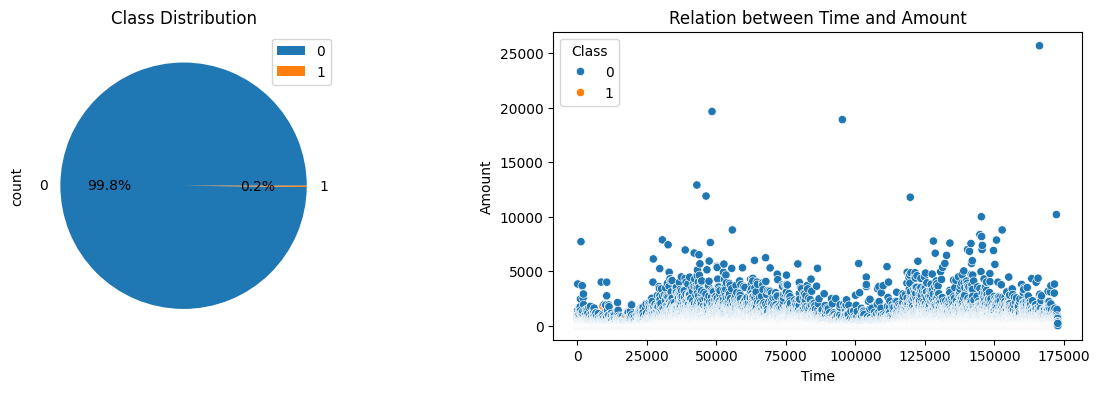

In [ ]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
df['Class'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title('Class Distribution')
plt.legend()
plt.subplot(1,2,2)
sns.scatterplot(x="Time",y="Amount",data=df,hue="Class")
plt.title('Relation between Time and Amount')
plt.show()

<Figure size 1600x400 with 0 Axes>

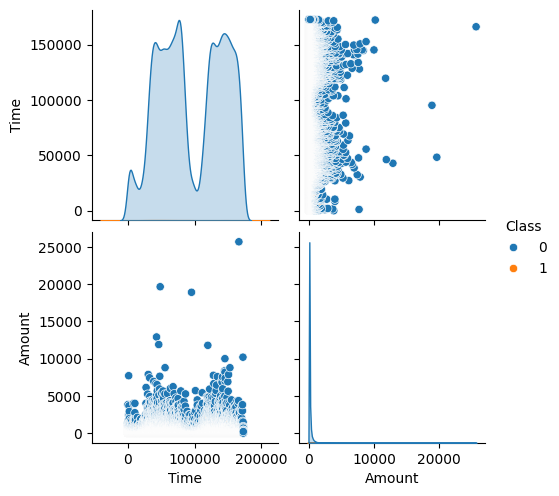

In [ ]:
plt.figure(figsize=(16,4))
sns.pairplot(new,hue='Class')
plt.show()

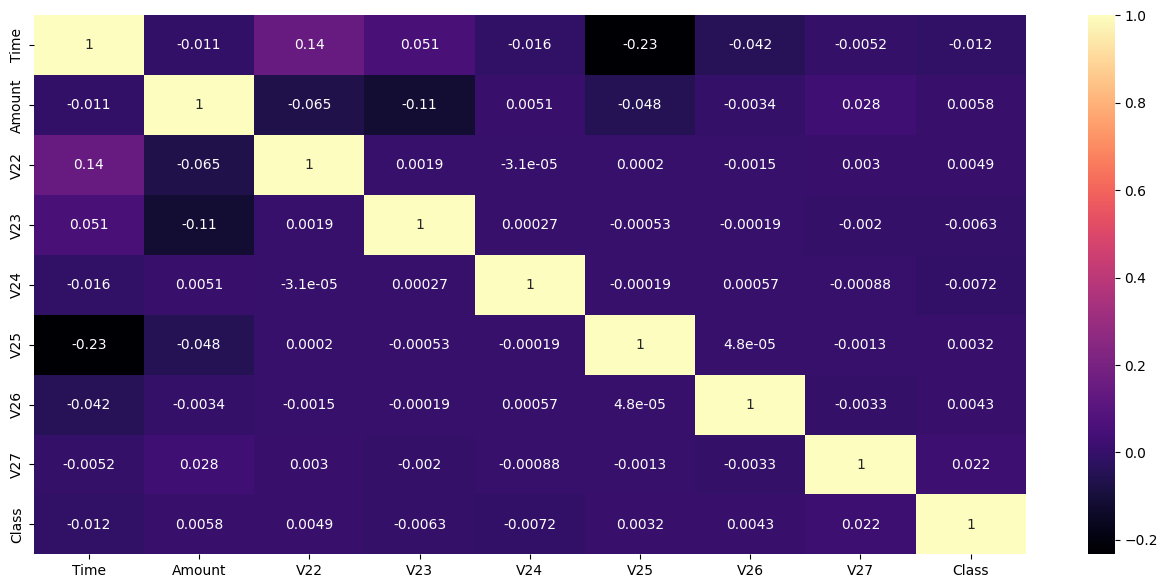

In [ ]:
heat=df[['Time','Amount','V22','V23','V24','V25','V26','V27','Class']]
plt.figure(figsize=(16,7))
sns.heatmap(heat.corr(),annot=True,cmap='magma')
plt.show()

<Figure size 1600x1000 with 0 Axes>

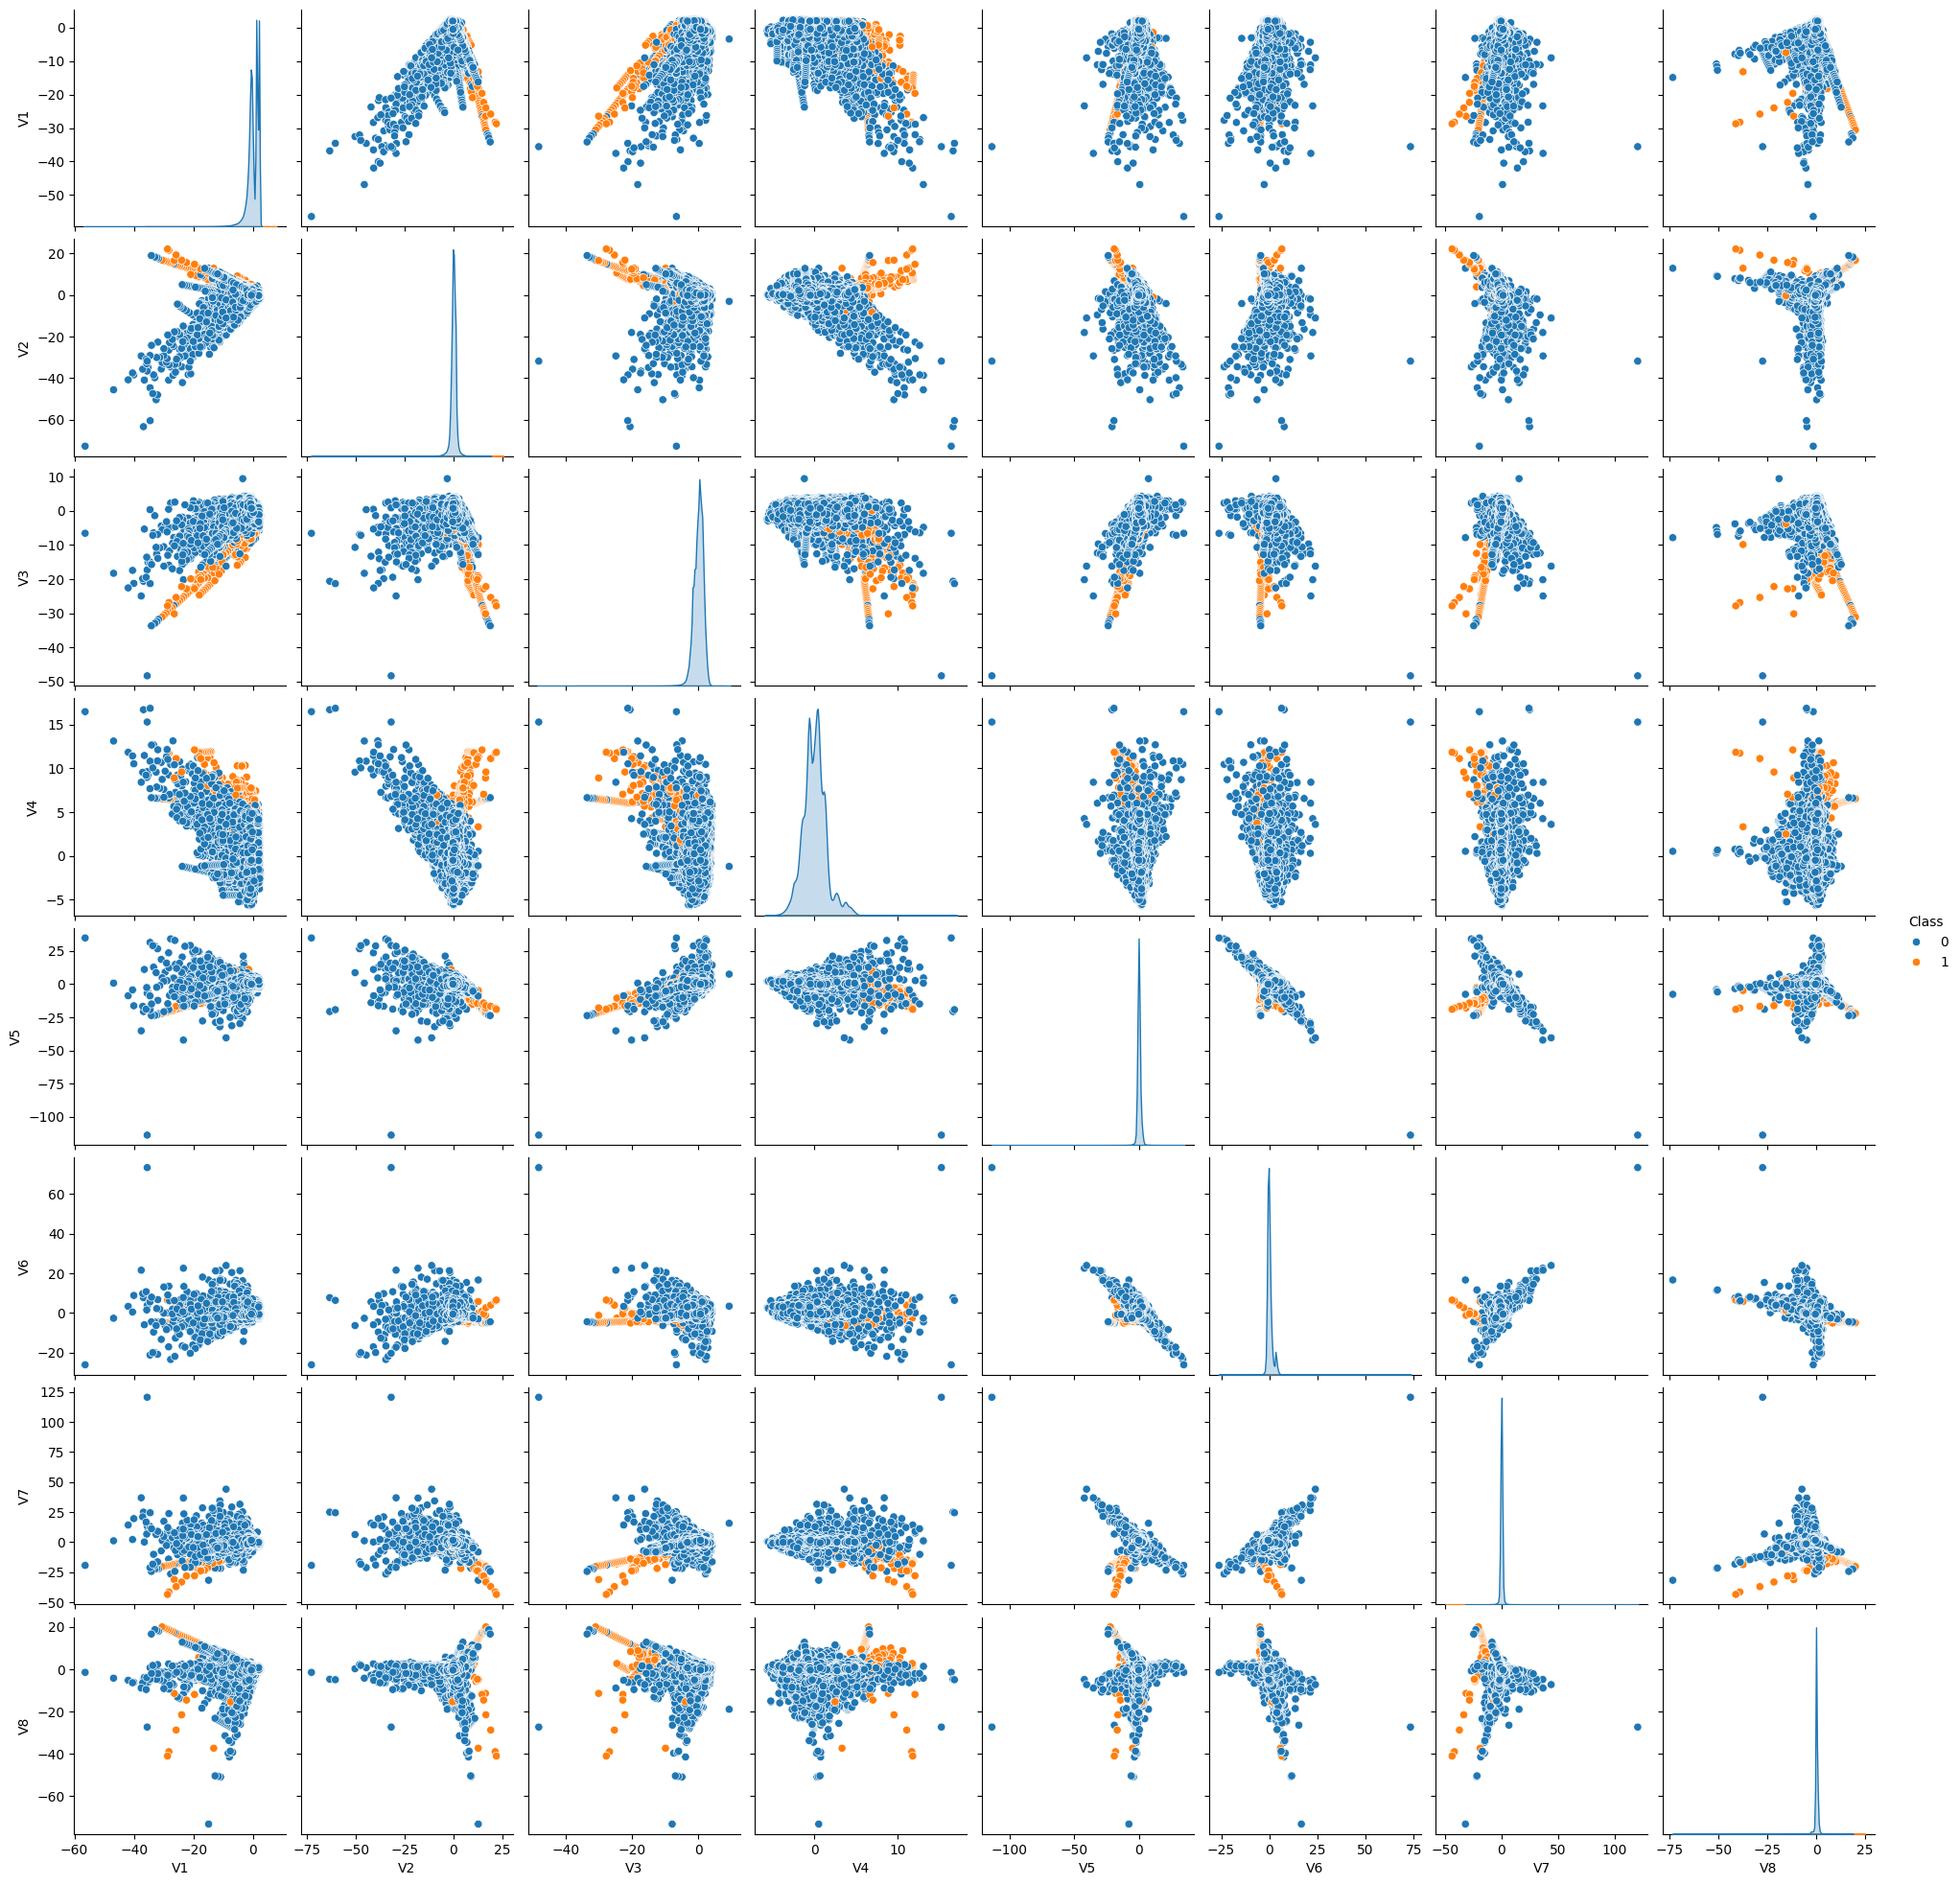

In [ ]:
plt.figure(figsize=(16,10))
sns.pairplot(df,hue='Class',vars=['V1','V2','V3','V4','V5','V6','V7','V8'])
plt.show()

In [ ]:
df['Class']=df['Class'].astype("category")

In [ ]:
df.duplicated().sum()

1081

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df = df.dropna(how='any',axis=1)

In [ ]:
col=df.columns
for i in col:
  if i=="Class":
    continue
  else:
    df[i]=df[i].astype("float64")

In [ ]:
y=df["Class"]
x=df.drop(["Class","Time"],axis=1)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
smot=SMOTE(sampling_strategy=0.1,random_state=2)
x_train,y_train=smot.fit_resample(x_train,y_train)

In [ ]:
from sklearn.preprocessing import StandardScaler
scale =StandardScaler()
x_train=scale.fit_transform(x_train)
x_test=scale.transform(x_test)

In [ ]:
rs=RandomForestClassifier()
rs.fit(x_train,y_train)
r=rs.predict(x_test)
print(accuracy_score(y_test,r))
print(precision_score(y_test,r))
print(recall_score(y_test,r))
print(f1_score(y_test,r))

0.9995594403129736
0.922077922077922
0.7888888888888889
0.8502994011976047


In [ ]:
ls=LogisticRegression(max_iter=100)
ls.fit(x_train,y_train)
l=ls.predict(x_test)
print(accuracy_score(y_test,l))
print(precision_score(y_test,l))
print(recall_score(y_test,l))
print(f1_score(y_test,l))


0.9979910478271596
0.4294117647058823
0.8111111111111111
0.5615384615384615


In [ ]:
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
x=xgb.predict(x_test)
print(accuracy_score(y_test,x))
print(precision_score(y_test,x))
print(recall_score(y_test,x))
print(f1_score(y_test,x))

0.9994537059880872
0.8554216867469879
0.7888888888888889
0.8208092485549133


In [ ]:
gd=GradientBoostingClassifier()
gd.fit(x_train,y_train)
g=gd.predict(x_test)
print(accuracy_score(y_test,g))
print(precision_score(y_test,g))
print(recall_score(y_test,g))
print(f1_score(y_test,g))

0.9988369224262503
0.6052631578947368
0.7666666666666667
0.676470588235294


In [ ]:
pac=AdaBoostClassifier()
pac.fit(x_train,y_train)
p=pac.predict(x_test)
print(accuracy_score(y_test,p))
print(precision_score(y_test,p))
print(recall_score(y_test,p))
print(f1_score(y_test,p))

0.9975504881401333
0.37435897435897436
0.8111111111111111
0.5122807017543859


In [ ]:
eexcpt=ExtraTreesClassifier()
eexcpt.fit(x_train,y_train)
e=eexcpt.predict(x_test)
print(accuracy_score(y_test,e))
print(precision_score(y_test,e))
print(recall_score(y_test,e))
print(f1_score(y_test,e))

0.9995418179254926
0.9324324324324325
0.7666666666666667
0.8414634146341464


In [ ]:
data=pd.DataFrame({
        'accuracy_score':[accuracy_score(y_test,l),accuracy_score(y_test,r),accuracy_score(y_test,x),accuracy_score(y_test,g),accuracy_score(y_test,p)],
        'precision_score':[precision_score(y_test,l),precision_score(y_test,r),precision_score(y_test,x),precision_score(y_test,g),precision_score(y_test,p)],
        'recall_score':[recall_score(y_test,l),recall_score(y_test,r),recall_score(y_test,x),recall_score(y_test,g),recall_score(y_test,p)],
        'f1_score':[f1_score(y_test,l),f1_score(y_test,r),f1_score(y_test,x),f1_score(y_test,g),f1_score(y_test,p)],
        'model':['LogisticRegression','RandomForestClassifier','XGBClassifier','GradientBoostingClassifier','AdaBoostClassifier']
    })

In [ ]:
data.head()

,accuracy_score,precision_score,recall_score,f1_score,model
0,0.997991,0.429412,0.811111,0.561538,LogisticRegression
1,0.999559,0.922078,0.788889,0.850299,RandomForestClassifier
2,0.999454,0.855422,0.788889,0.820809,XGBClassifier
3,0.998837,0.605263,0.766667,0.676471,GradientBoostingClassifier
4,0.997550,0.374359,0.811111,0.512281,AdaBoostClassifier


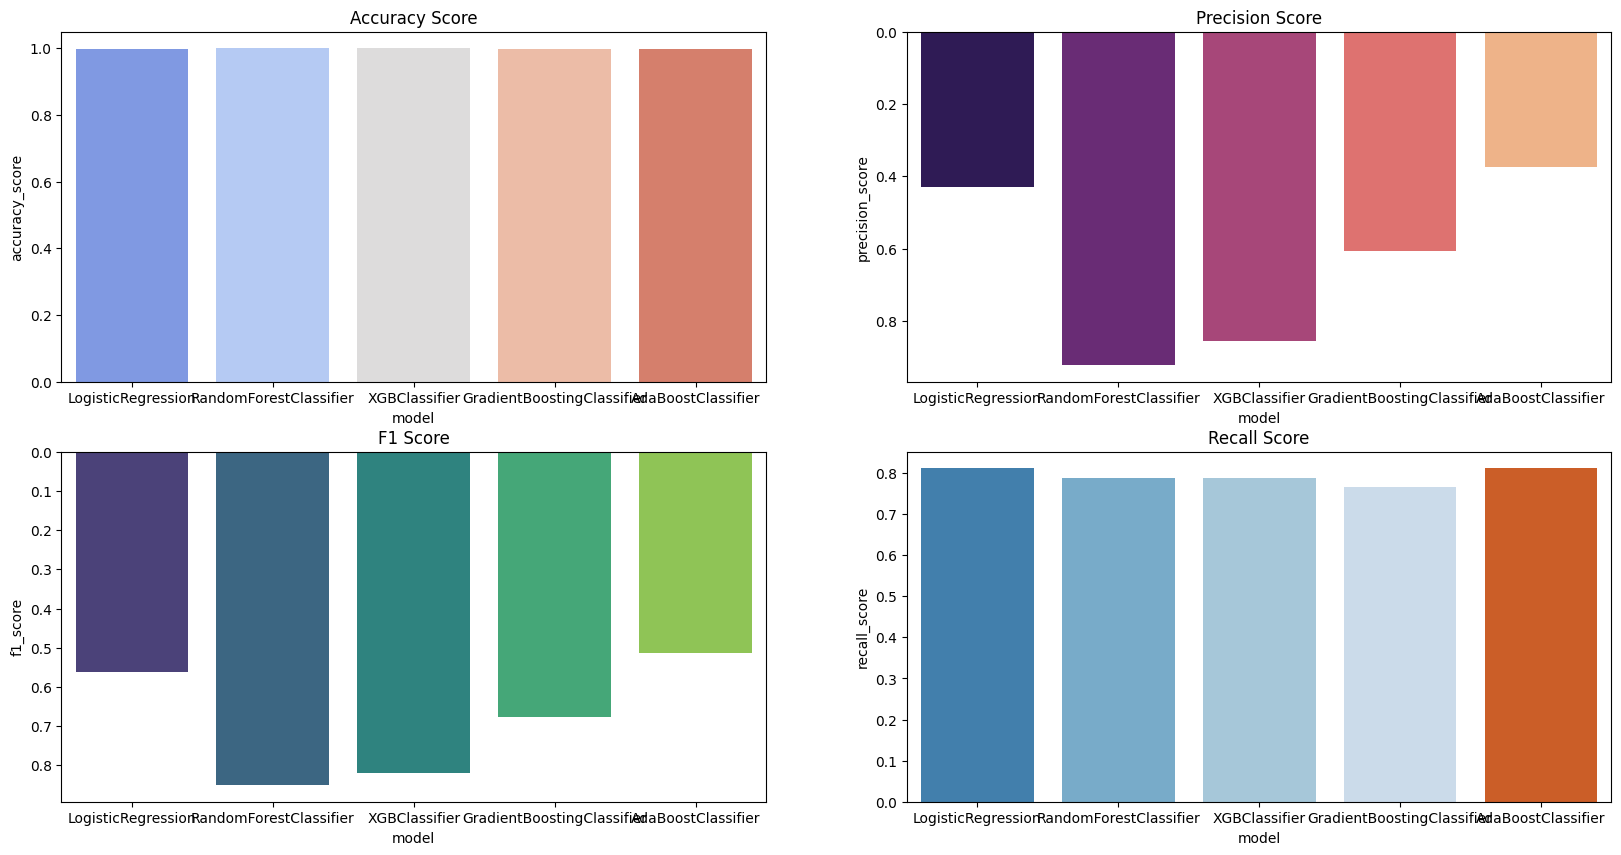

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.barplot(x='model',y='accuracy_score',data=data,hue='model',palette='coolwarm')
plt.title('Accuracy Score')
plt.subplot(2,2,2)
sns.barplot(x='model',y='precision_score',data=data,hue='model',palette='magma')
plt.gca().invert_yaxis()
plt.title('Precision Score')
plt.subplot(2,2,3)
sns.barplot(x='model',y='f1_score',data=data,hue='model',palette='viridis')
plt.gca().invert_yaxis()
plt.title('F1 Score')
plt.subplot(2,2,4)
sns.barplot(x='model',y='recall_score',data=data,hue='model',palette='tab20c')
plt.title('Recall Score')
plt.show()

In [ ]:
log=confusion_matrix(y_test,l)
ran=confusion_matrix(y_test,r)
xgb=confusion_matrix(y_test,x)
eexcpt=confusion_matrix(y_test,e)

<Figure size 640x480 with 0 Axes>

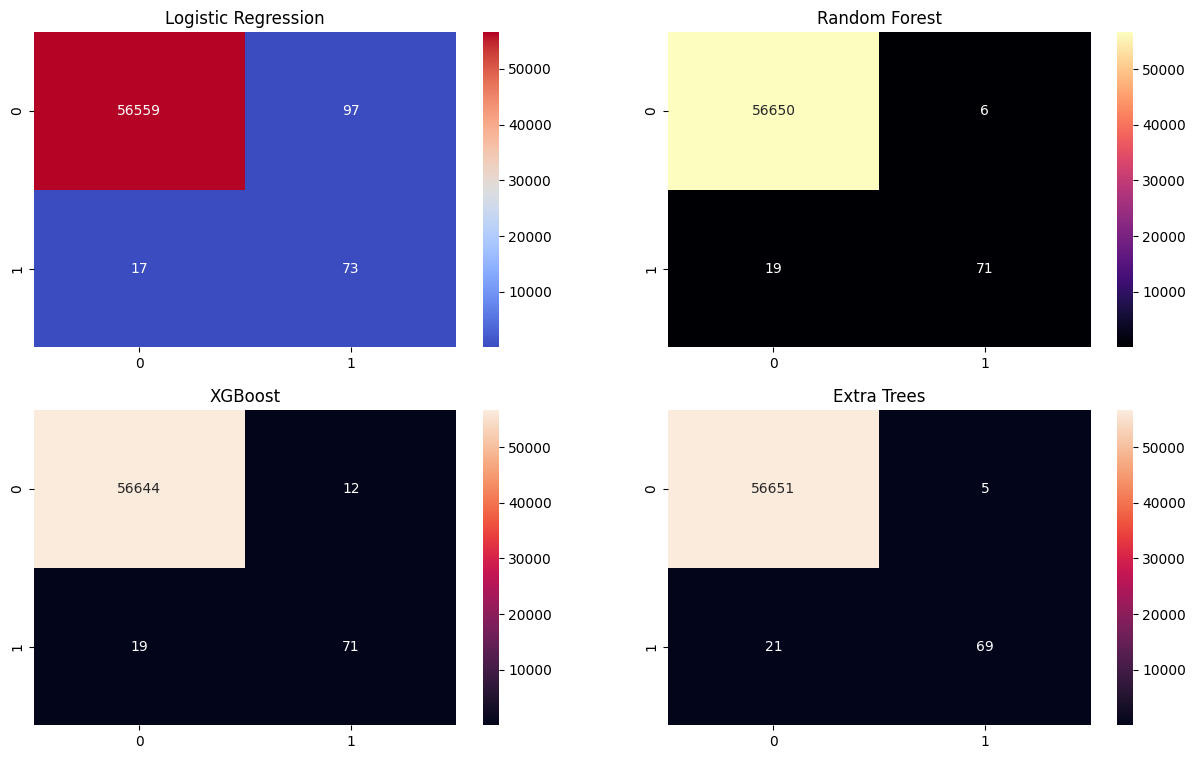

In [ ]:
plt.tight_layout()
plt.figure(figsize=(15,9))
plt.subplot(2,2,1)
plt.title("Logistic Regression")
sns.heatmap(log,annot=True,fmt="d",cmap='coolwarm')
plt.subplot(2,2,2)
plt.title("Random Forest")
sns.heatmap(ran,annot=True,fmt="d",cmap='magma')
plt.subplot(2,2,3)
plt.title("XGBoost")
sns.heatmap(xgb,annot=True,fmt="d")
plt.subplot(2,2,4)
plt.title("Extra Trees")
sns.heatmap(eexcpt,annot=True,fmt="d")
plt.show()